In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# Functions

In [58]:
def file_paths(folder):
    file_list = []
    for root, _, filenames in os.walk(folder):
        for filename in filenames:
            file_list.append(os.path.join(root, filename))
    return file_list
def read_lines(path):
    f = open(path, 'r')
    lines = f.readlines()
    for line in lines:
        print(line)
def merge_phyphox_data(data_file_paths):
    DF, dnames = [], ['Flat','Plane','Side','Upright']
    for file_path in data_file_paths[0:4]:
        bname = os.path.basename(file_path).split('.')[0]
        if bname in dnames:
            df = pd.read_csv(file_path)
            df.columns = [col if col == 't (s)' else bname+' '+col for col in df.columns]
            DF.append(df)
    if len(DF)>0:
        df = pd.concat(DF,axis=1)
        df = df.T.drop_duplicates().T
    else:
        print('no dataframes')
    try:
        df_t = pd.read_csv(data_file_paths[-1])
        df_t['system time text'] = pd.to_datetime(df_t['system time text'])
        t_ini = df_t['system time text'][0]
        df['time'] = pd.to_timedelta(df_b['t (s)'],unit='s') + t_ini
        return df
    except:
        print(t_ini)
        return df
def plot_phyphox_data(exp_folders_path):
    df = merge_phyphox_data(file_paths(exp_folders_path))
    ax = df.plot('t (s)',['Flat Tilt up/down (deg)', 'Flat Tilt left/right (deg)',
       'Plane Inclination (deg)', 'Plane Rotation (deg)',
       'Side Tilt up/down (deg)', 'Side Tilt left/right (deg)',
       'Upright Tilt up/down (deg)'],figsize=(20,10),grid=True)
    plt.title(exp_folders_path.split('\\')[-1])
def interpolate(t,val1,val2):
    return val1[0]+(val2[1]-val1[1])/(val2[0]-val1[0])*(t-val1[0])

# Run

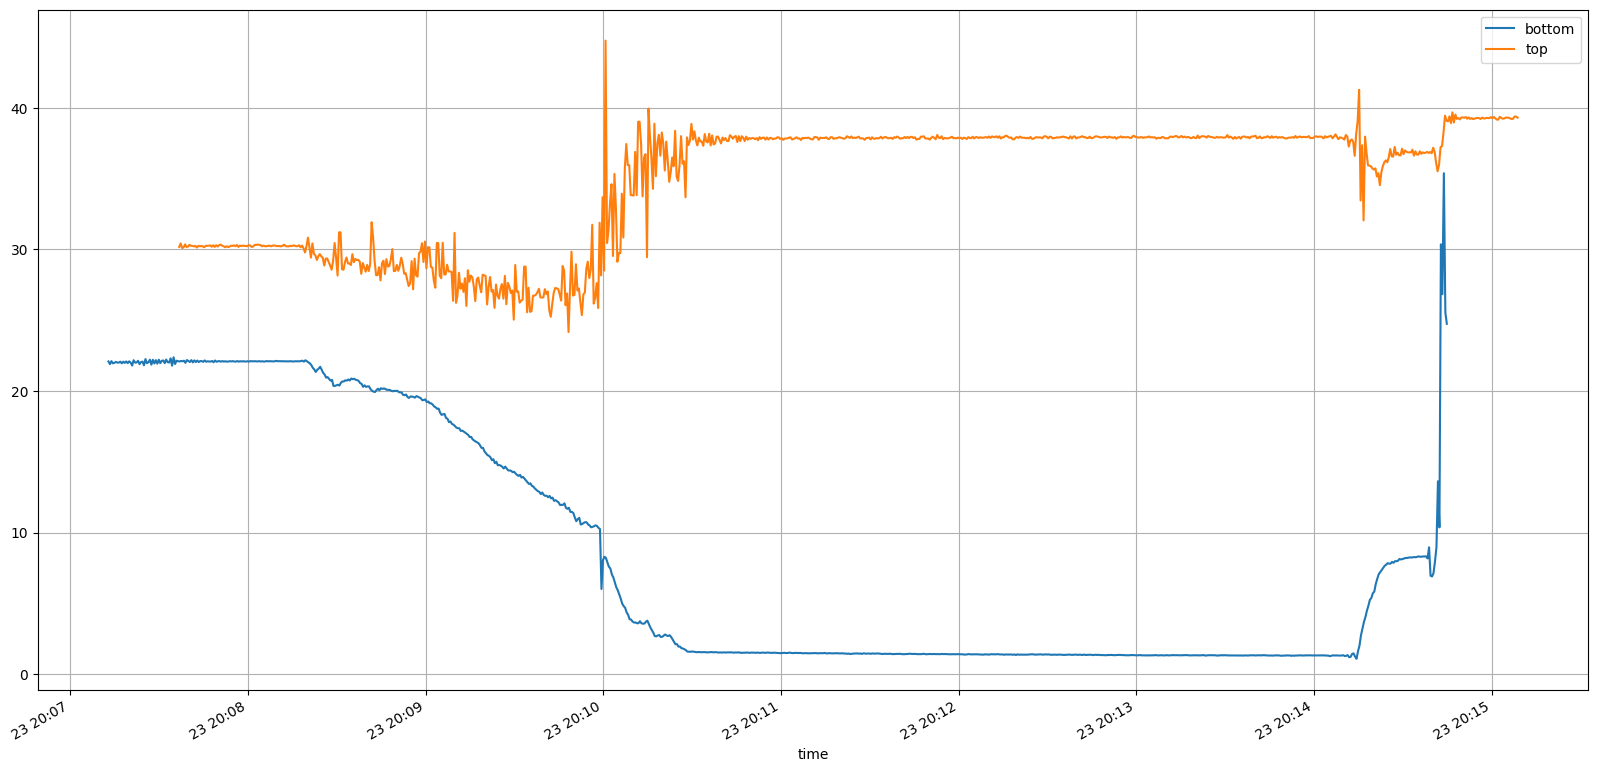

In [59]:
folder_bottom = r'C:\Users\dmchacon\Documents\Phyphox\Inclination 2022-11-23_2.8_bottom'
b_paths = file_paths(folder_bottom)
df_b = merge_phyphox_data(b_paths)

folder_top = r'C:\Users\dmchacon\Documents\Phyphox\Inclination 2022-11-23_2.8_top'
t_paths = file_paths(folder_top)
df_t = merge_phyphox_data(t_paths)

fig,ax = plt.subplots()
df_b.plot('time', 'Plane Inclination (deg)', ax=ax, figsize=(20,10),grid=True)
df_t.plot('time', 'Plane Inclination (deg)', ax=ax, figsize=(20,10),grid=True)
ax.legend(['bottom','top'])
plt.show()

In [42]:
1528.78/0.0179

85406.70391061452

In [61]:
df_b

,t (s),Flat Tilt up/down (deg),Flat Tilt left/right (deg),Plane Inclination (deg),Plane Rotation (deg),Side Tilt up/down (deg),Side Tilt left/right (deg),Upright Tilt up/down (deg),time
0,0.502335,22.089446,-0.110944,22.089673,-0.273365,90.273365,90.110944,67.910554,2022-11-23 20:07:12.899335+04:00
1,1.002335,21.897927,0.233709,21.898947,0.581415,89.418585,89.766291,68.102073,2022-11-23 20:07:13.399335+04:00
2,1.502335,22.108850,-0.146070,22.109243,-0.359563,90.359563,90.146070,67.891150,2022-11-23 20:07:13.899335+04:00
3,2.002335,21.955020,0.237881,21.956074,0.590093,89.409907,89.762119,68.044980,2022-11-23 20:07:14.399335+04:00
4,2.502335,21.989631,-0.127130,21.989932,-0.314820,90.314820,90.127130,68.010369,2022-11-23 20:07:14.899335+04:00
...,...,...,...,...,...,...,...,...,...
883,450.502335,29.506035,-8.572271,30.355120,-14.915438,104.915438,98.572271,60.493965,2022-11-23 20:14:42.899335+04:00
884,451.002335,26.740304,-2.642933,26.836650,-5.234800,95.234800,92.642933,63.259696,2022-11-23 20:14:43.399335+04:00
885,451.502335,32.094929,18.404828,35.373979,27.948283,62.051717,71.595172,57.905071,2022-11-23 20:14:43.899335+04:00
886,452.002335,24.530343,8.047023,25.536751,17.212485,72.787515,81.952977,65.469657,2022-11-23 20:14:44.399335+04:00


In [64]:
df_b['Bottom Plane Inclination (deg)'] = df_b['Plane Inclination (deg)']
df_t['Top Plane Inclination (deg)'] = df_t['Plane Inclination (deg)']
df_phy = pd.concat([df_b[['time','Bottom Plane Inclination (deg)']],df_t[['time','Top Plane Inclination (deg)']]])
df_phy = df_phy.sort_values(by='time')
df_phy

,time,Bottom Plane Inclination (deg),Top Plane Inclination (deg)
0,2022-11-23 20:07:12.899335+04:00,22.089673,NaN
1,2022-11-23 20:07:13.399335+04:00,21.898947,NaN
2,2022-11-23 20:07:13.899335+04:00,22.109243,NaN
3,2022-11-23 20:07:14.399335+04:00,21.956074,NaN
4,2022-11-23 20:07:14.899335+04:00,21.989932,NaN
...,...,...,...
920,NaT,NaN,37.613309
921,NaT,NaN,42.534761
922,NaT,NaN,29.792283
923,NaT,NaN,22.672632


<AxesSubplot: xlabel='time'>

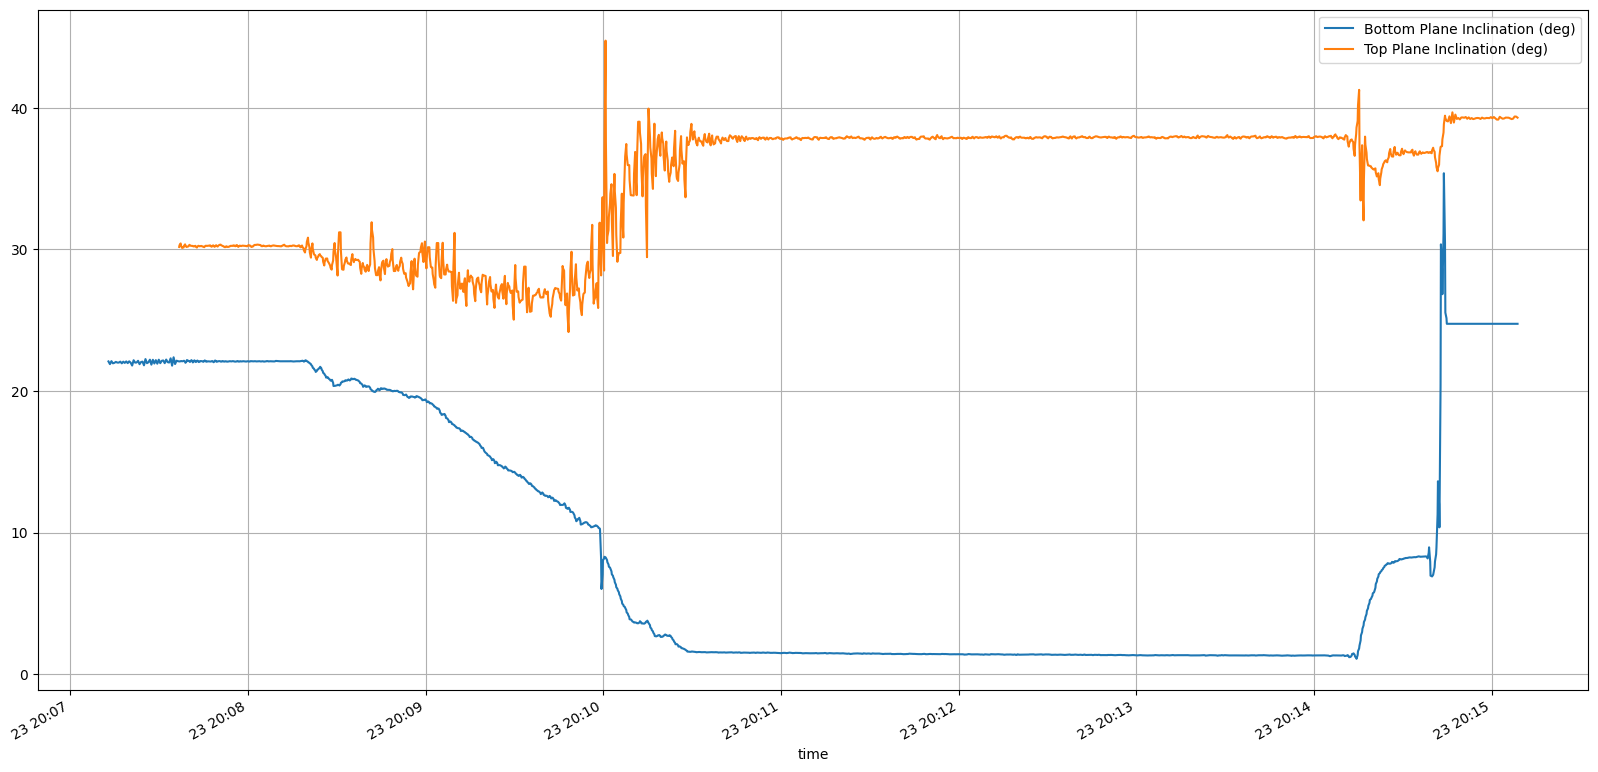

In [65]:
df_phy['Bottom Plane Inclination (deg)'] = df_phy['Bottom Plane Inclination (deg)'].interpolate()
df_phy['Top Plane Inclination (deg)'] = df_phy['Top Plane Inclination (deg)'].interpolate()
df_phy = df_phy.drop_duplicates()
df_phy = df_phy.reset_index(drop=True)
df_phy.plot('time',['Bottom Plane Inclination (deg)','Top Plane Inclination (deg)'],figsize=(20,10),grid=True)

In [66]:
df_phy.time[0]

Timestamp('2022-11-23 20:07:12.899335+0400', tz='pytz.FixedOffset(240)')

In [19]:
ini_bott = df_phy[(df_phy.time>=470+val)&(df_phy.time<=495+val)]['Bottom Plane Inclination (deg)'].mean()
ini_bott

22.095948445459182

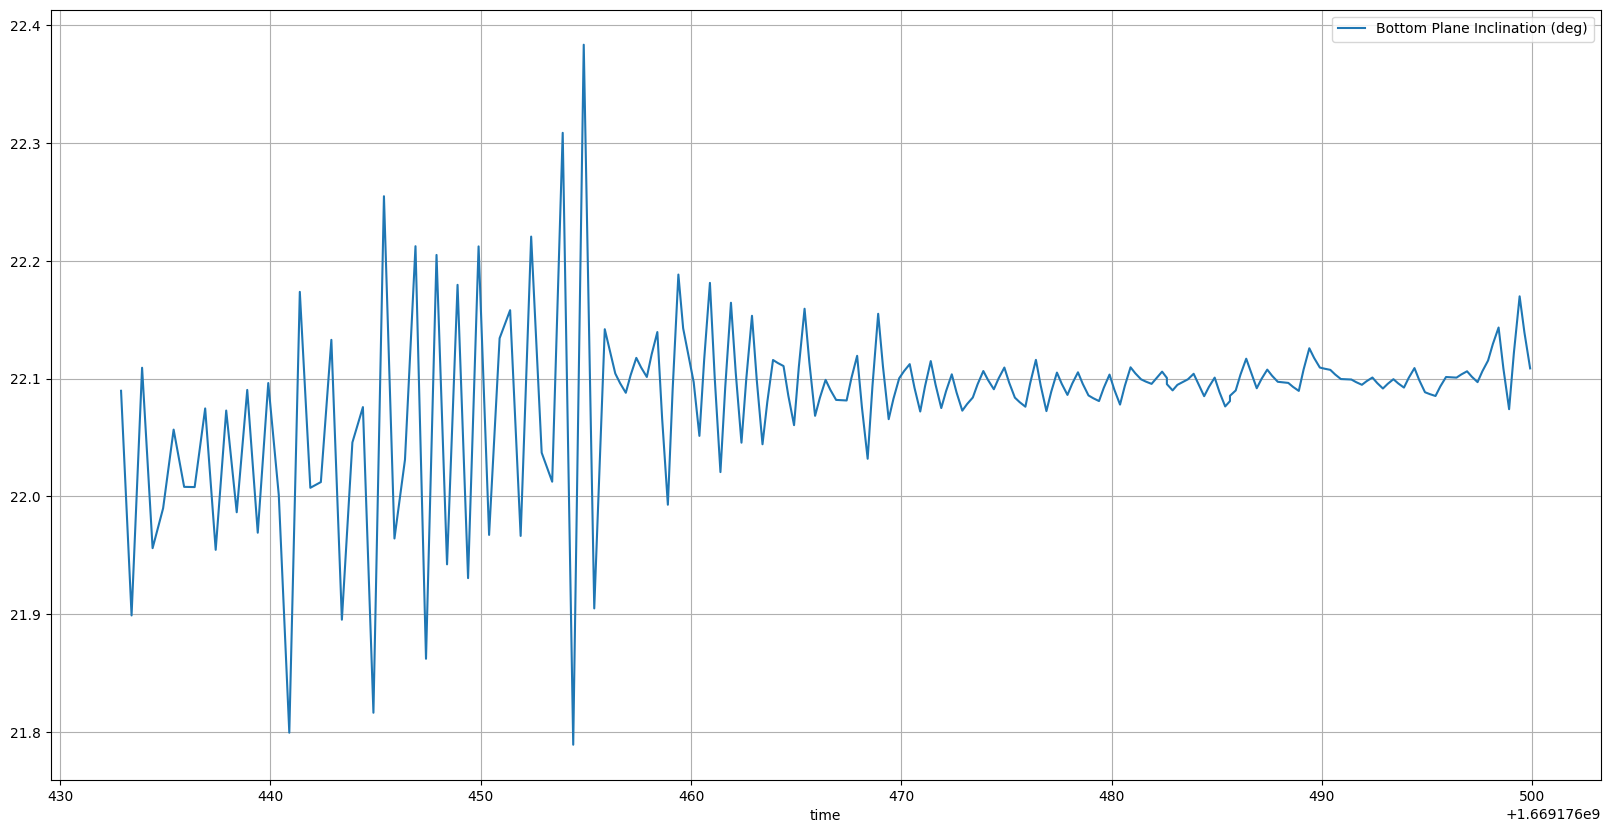

In [18]:
ax = df_phy[(df_phy.time>=140+val)&(df_phy.time<=500+val)].plot('time','Bottom Plane Inclination (deg)',figsize=(20,10),grid=True)

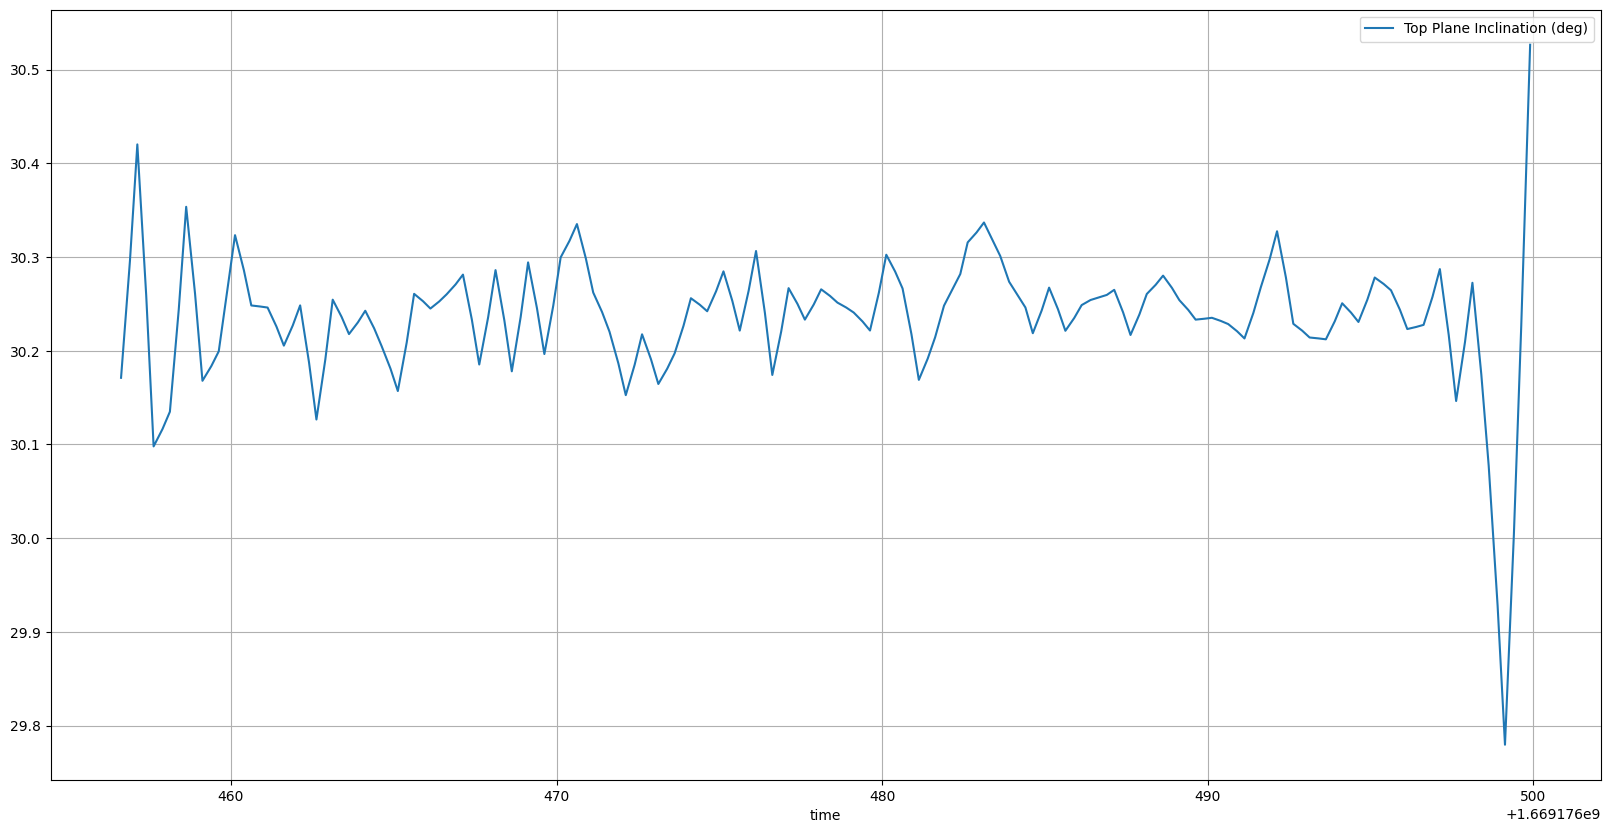

In [20]:
ax = df_phy[(df_phy.time>=140+val)&(df_phy.time<=500+val)].plot('time','Top Plane Inclination (deg)',figsize=(20,10),grid=True)

In [21]:
ini_top = df_phy[(df_phy.time>=470+val)&(df_phy.time<=495+val)]['Top Plane Inclination (deg)'].mean()
ini_top

30.24666363051021

In [22]:
df_phy['Bottom Fixed Plane Inclination (deg)'] = df_phy['Bottom Plane Inclination (deg)'] - (ini_bott-ini_top)

<AxesSubplot: xlabel='time'>

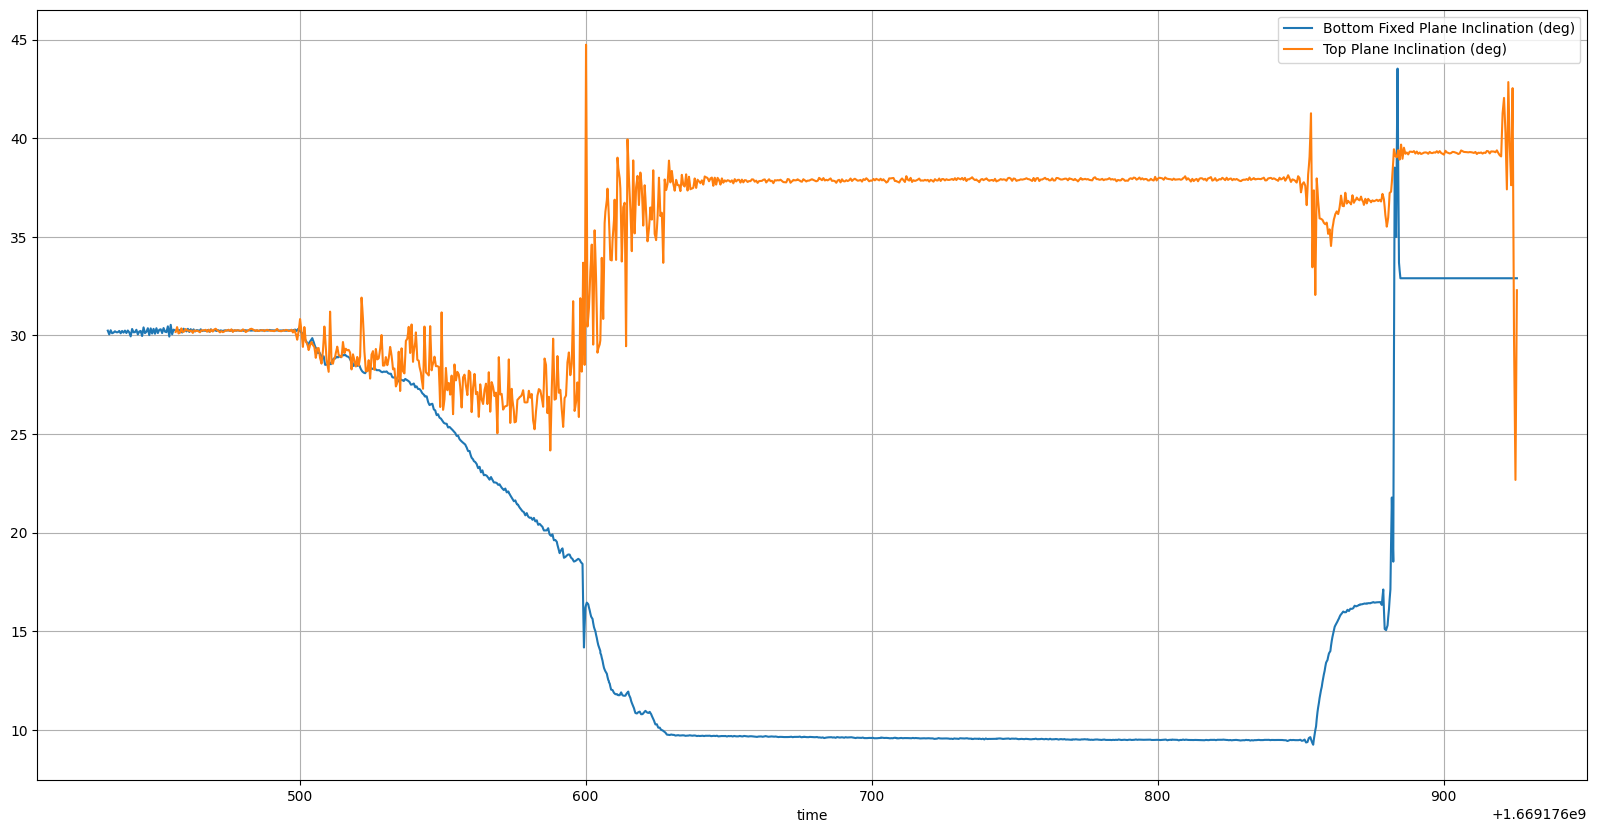

In [25]:
df_phy.plot('time',['Bottom Fixed Plane Inclination (deg)','Top Plane Inclination (deg)'],figsize=(20,10),grid=True)

In [23]:
df_phy['difference'] = df_phy['Bottom Fixed Plane Inclination (deg)'] - df_phy['Top Plane Inclination (deg)']

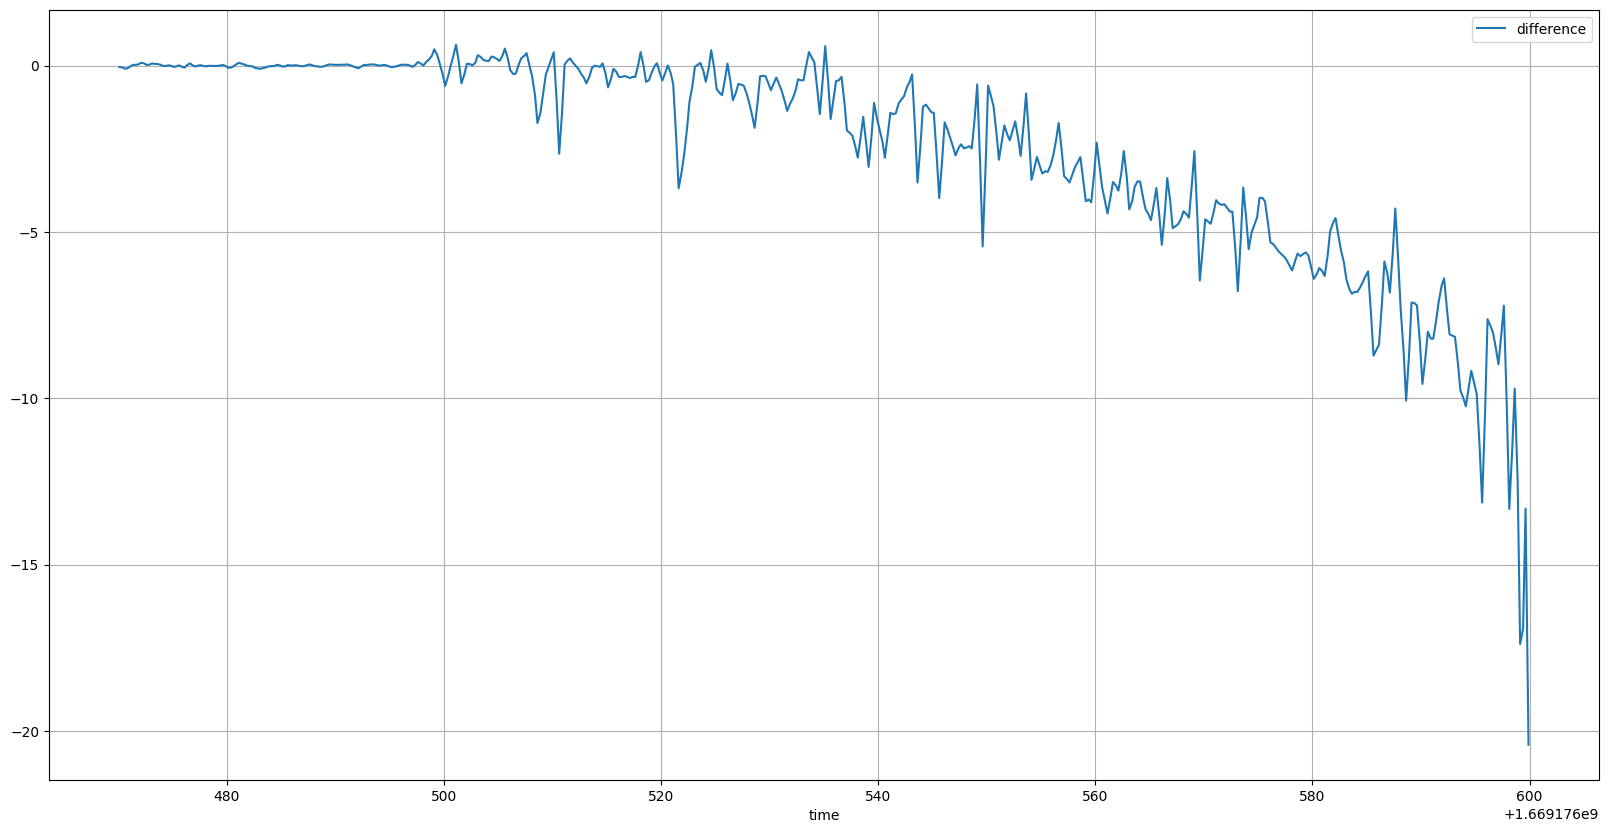

In [26]:
ax = df_phy[(df_phy.time>=470+val)&(df_phy.time<=600+val)].plot('time','difference',figsize=(20,10),grid=True)

In [44]:
np.deg2rad(12.5) * 2.89/2 /(16+7/8)

0.018681487178754123